<a href="https://colab.research.google.com/github/dami163/Assignment/blob/main/Q_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(-0.5, 779.5, 437.5, -0.5)

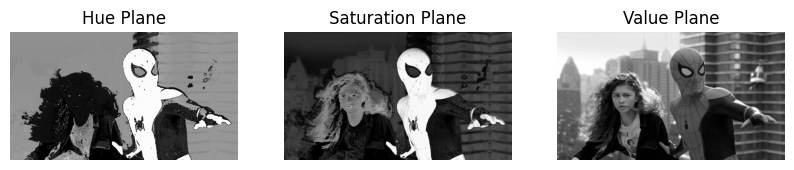

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("spider.png",cv.IMREAD_COLOR)
im = cv.cvtColor(image, cv.COLOR_BGR2HSV)
imc = cv.cvtColor(image, cv.COLOR_BGR2RGB)

h_img,s_img,v_img = cv.split(im)

fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].imshow(h_img, cmap='gray')
ax[0].set_title('Hue Plane')
ax[0].axis('off')

ax[1].imshow(s_img, cmap='gray')
ax[1].set_title('Saturation Plane')
ax[1].axis('off')

ax[2].imshow(v_img, cmap='gray')
ax[2].set_title('Value Plane')
ax[2].axis('off')

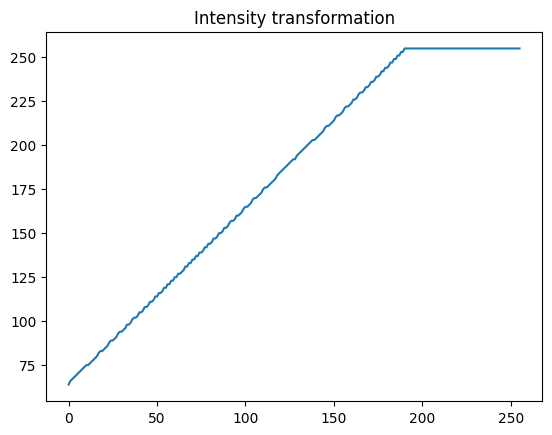

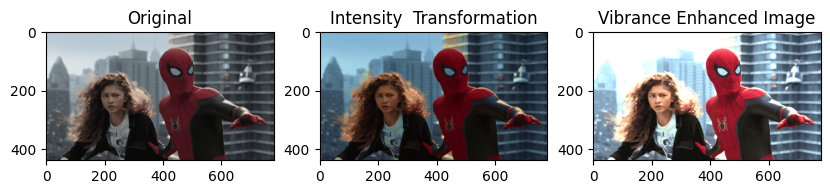

In [8]:
x = np.arange(0,256).astype('uint8')



a = 0.5
sigma = 70

Y = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255).astype('uint8')


image_transform = cv.LUT(s_img,Y)
plt.title('Intensity transformation')
plt.plot(Y)
plt.plot()

newHSV = cv.merge([h_img,image_transform,v_img])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
newHSV1 = cv.cvtColor(result, cv.COLOR_BGR2RGB)
added_img = cv.add(newHSV1, imc)


fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(imc)
ax[0].set_title('Original')
ax[1].imshow(newHSV1)
ax[1].set_title('Intensity  Transformation')
ax[2].imshow(added_img)
ax[2].set_title('Vibrance Enhanced Image')
plt.show()

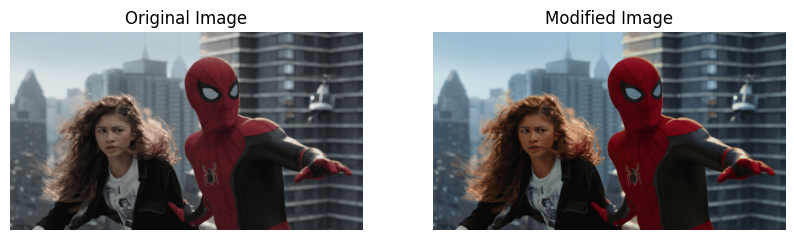

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def enhance_saturation(pixel, a, sigma):
    return min(pixel + a * (np.exp(-(pixel - 128) ** 2 / (2 * sigma ** 2))) * 128, 255)

image = cv.imread("spider.png")

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

saturation_channel = hsv_image[:, :, 1]

a = 0.6
sigma = 70

enhanced_saturation = np.zeros_like(saturation_channel)
for i in range(saturation_channel.shape[0]):
    for j in range(saturation_channel.shape[1]):
        enhanced_saturation[i, j] = enhance_saturation(saturation_channel[i, j], a, sigma)

hsv_image[:, :, 1] = enhanced_saturation.astype(np.uint8)

modified_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Modified Image')
ax[1].axis('off')

plt.show()

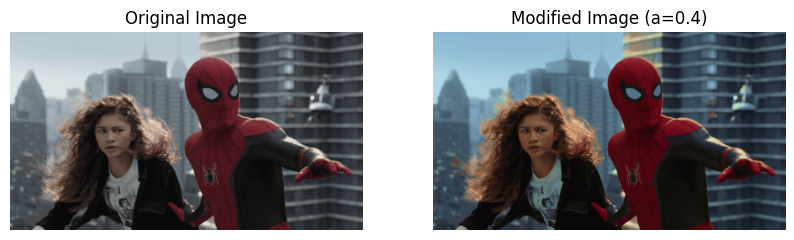

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def f(x, a, sigma):
    return np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255)

image = cv.imread("spider.png")

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
saturation_plane = hsv_image[:, :, 1]

a = 0.4
sigma = 70

modified_saturation = f(saturation_plane, a, sigma)

hsv_image[:, :, 1] = modified_saturation.astype(np.uint8)
modified_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Modified Image (a={a})')
ax[1].axis('off')
plt.show()

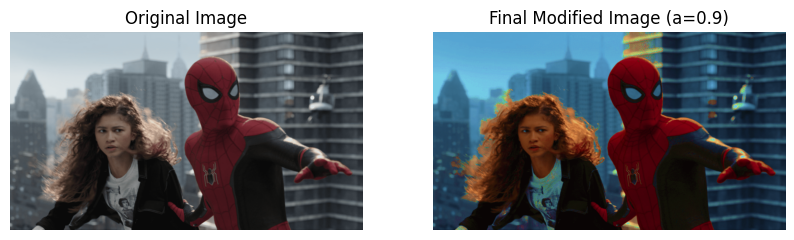

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def f(x, a, sigma):
    return np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255)
image = cv.imread("spider.png")

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
hue_plane, saturation_plane, value_plane = cv.split(hsv_image)

a = 0.9
sigma = 70

modified_saturation = f(saturation_plane, a, sigma)

hsv_image[:, :, 1] = modified_saturation.astype(np.uint8)
modified_image = cv.merge([hue_plane, hsv_image[:, :, 1], value_plane])
final_modified_image = cv.cvtColor(modified_image, cv.COLOR_HSV2BGR)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(final_modified_image, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Final Modified Image (a={a})')
ax[1].axis('off')
plt.show()